<a href="https://colab.research.google.com/github/ArifAygun/Iron-Ore-Froth-Flotation-Quality-Prediction/blob/main/AA_Graduate_Project_1_0604.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Quality Prediction of Iron Ore Mining Flotation Process - Part:1**

## **1. Problem Definition**

**Gangue concentrate predict in the reverse cationic flotation:**


Mined ores are mostly mixtures of extractable minerals and nonvaluable material (gangue). Mineral processing (e.g. ore dressing, ore beneficiation) follows mining and prepares the ore for extraction of the valuable metal. A principal step in mineral processing is physical separation of the particles of valuable minerals from the gangue, to produce an enriched portion (concentrate) containing most of the valuable minerals, and a discard (tailing) containing predominantly the gangue.

A separation of minerals by exploiting difference of surface properties (hydrophobicity) is called flotation. **The reverse cationic flotation** is commonly used to separate iron from silica. By adjusting the 'chemistry' of the pulp by adding various chemical reagents, iron minerals remain in the water and create sediment with a high concentration of iron (valuable minerals). At the same time, silica particles (gangue) attach to air bubbles and float to the surface.

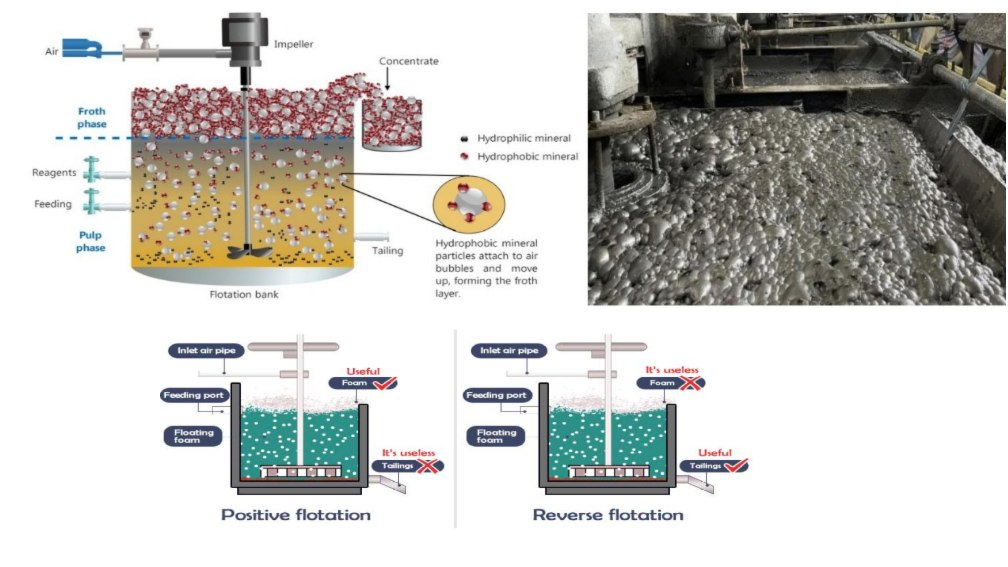

Flotation concentrate is periodically sampled to determine its purity (percentage of gangue). Higher purity in the concentrate is undesirable as it indicates that most valuable minerals had gone into the tailing. Purity measurement is usually done in a lab and can take some time before process engineers can make any adjustments based on the results. A timely investigation of concentrate purity is, therefore, a fundamental aspect for the control and optimization of the flotation process.

This project explores the application of machine learning to predict gangue (silica) concentrate in the flotation output. The prediction will help process engineers assess the purity and take corrective actions in advance.

Source of dataset: https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process

##**2. Data Understanding**

###**2.1. Data Definitions**

- **Date**: Data collection time. (There is imbalance in measurement of variables)
- **% Iron Feed**: Feed grade of iron-containing ore.
- **% Silica Feed**: Feed grade of silica-containing ore.
- **Starch Flow**: Depressant chemical for Iron(Fe) containing ore measured in m³/h.
- **Amina Flow**: Collector chemical for Silica containing ore measured in m³/h.
- **Ore Pulp Flow**: The amount of pulp flow fed to the flotation columns as the product of the previous process step measured in t/h.
- **Ore Pulp pH**: pH is measured in pH scale.
- **Ore Pulp Density**: The solid percent of ore fed density ranges in kg/cm³
- **Flotation Column 01, 02, 03, 04, 05, 06, 07 Air Flow**: Air Flows that goes into the flotation cell measured in Nm³/h.
- **Flotation Column 01, 02, 03, 04, 05, 06, 07 Level**: Froth level in the flotation cell measured in mm.
- **% Iron Concentrate**: Concentrate grade of iron-containing ore in percentage.
- **% Silica Concentrate**: Concentrate grade of silica-containing ore in percentage

### **2.2. Inspection of the data**

- The first column shows time and date range (march 2017 -  september 2017). 
- Measurements are taken every 5-6 hours for the first 2 columns (input - raw material).
- Measurements are taken every 1 hour for the last 2 columns (output - raw material). 
- Some columns were sampled every 20 second. 
- The second and third columns are quality measures of the iron ore pulp right before it is fed into the flotation plant. 
- From Column 4 until column 8 are the most important variables that impact in the ore quality in the end of the process. 
- From column 9 until column 22, we can see process data (froth level and air flow inside the flotation columns, which also impact in ore quality). 
- The last two columns are the final iron ore pulp quality measurement from the lab. 

### **2.3. Aim of the project**

- To predict the percentage of output (iron and silica) concentrate in the plant output

##**3. Data Collection**

###**3.1. Import libraries and modules**

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, norm, boxcox, mstats
from sklearn.preprocessing import MinMaxScaler
import os
import joblib
import warnings
warnings.filterwarnings("ignore")

###**3.2. Import dataset**

In [116]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Flotation/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Flotation


In [117]:
flotation = pd.read_csv('Flotation_Plant.csv')

##**4. Data Preprocessing**

###**4.1. Dataset information**

In [118]:
flotation.sample(5).T

,250242,411536,239166,11496,686569
date,2017-05-20 05:00:00,2017-06-26 13:00:00,2017-05-17 15:00:00,2017-03-12 16:00:00,2017-08-29 05:00:00
% Iron Feed,"64,03","49,08","64,03","59,05","56,02"
% Silica Feed,"6,26","26,83","6,26","11,2","13,51"
Starch Flow,"3519,63","5506,77","3103,52","3756,93","2422,62"
Amina Flow,"400,801","728,6374688797","537,808","563,354","566,357"
Ore Pulp Flow,"399,303","393,2038165138","405,827","399,185","385,369"
Ore Pulp pH,"9,72522","10,1612","10,003","9,8282","8,7550587435"
Ore Pulp Density,"1,62067","1,72803","1,74928","1,74384","1,73028"
Flotation Column 01 Air Flow,"299,487","298,032","249,953","248,379","300,247"
Flotation Column 02 Air Flow,"295,692","291,396","245,726","244,951","299,899"


In [119]:
flotation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

###**4.2. Unbalanced Data Manipulation**

- Ore Pulp Flow (plant input ore slury) is aproximately 400 t/h. 
- When we look the Ore Pulp Flow column most of the values with different decimal figures ("394,57" - "568848") in tons/hour
- Starch Flow and Amina Flow columns have different unbalanced values ("3019,53" - "367383" - "3121" - "1645,3466666667") in m³/hour
- Ore Pulp Density has not any problem ("1,74" - "1,78055")
- Ore Pulp pH must  be in range 0-14. But some values in thousand ("10068" - "9,95376")
- Flotation Column Air Flow values ("249.214" - "300.2481959288") in Nm³/h
- Flotation Column Level values ("453.942" - "868.6261818182") in mm
- There is no problem in % Iron Concentrate, % Silica Concentrate columns




In [120]:
columns_to_convert = ['% Iron Feed', '% Silica Feed', '% Iron Concentrate', 
                      '% Silica Concentrate', 'Ore Pulp Density']

for column in columns_to_convert:
    flotation[column] = flotation[column].str.replace(',', '.').astype(float).round(2)

In [121]:
columns_to_update = ["Starch Flow", "Amina Flow", "Ore Pulp Flow"]

flotation[columns_to_update] = (flotation[columns_to_update].replace(",", "", regex=True)
                               .apply(lambda x: x.str[:3] + "." + x.str[3:])
                               .astype(float).round(3))

In [122]:
flotation["Ore Pulp pH"] = (flotation["Ore Pulp pH"].str.replace(",", ".", regex=True)
                           .apply(lambda x: float(x[:2] + x[2:].replace(".", "")) 
                           if "," in x else float(x)).round(2))

In [123]:
columns_to_update = ["Flotation Column 01 Air Flow", "Flotation Column 02 Air Flow", "Flotation Column 03 Air Flow",
                     "Flotation Column 04 Air Flow", "Flotation Column 05 Air Flow", "Flotation Column 06 Air Flow",
                     "Flotation Column 07 Air Flow"]
                     
for column in columns_to_update:
    flotation[column] = flotation[column].str.replace(",", "")
    flotation[column] = flotation[column].apply(lambda x: "{:d}.{:s}".format(int(x[:3]), x[3:]) if len(x) > 3 else np.nan)
    flotation[column] = flotation[column].astype('float64').round(3)

In [124]:
columns_to_update = ["Flotation Column 01 Level", "Flotation Column 02 Level", "Flotation Column 03 Level",
                     "Flotation Column 04 Level", "Flotation Column 05 Level", "Flotation Column 06 Level",
                     "Flotation Column 07 Level"]

for column in columns_to_update:
    flotation[column] = flotation[column].str.replace(",", "")
    flotation[column] = flotation[column].apply(lambda x: "{:d}.{:s}".format(int(x[:3]), x[3:]) if len(x) > 3 else np.nan)
    flotation[column] = flotation[column].astype('float64').round(3)


In [125]:
flotation.sample(5).T

,546731,135191,260386,59020,572118
date,2017-07-27 20:00:00,2017-04-23 14:00:00,2017-05-22 13:00:00,2017-04-05 22:00:00,2017-08-02 17:00:00
% Iron Feed,57.46,55.17,64.03,54.56,57.46
% Silica Feed,10.8,14.35,6.26,17.66,10.8
Starch Flow,420.508,163.171,195.398,219.608,293.998
Amina Flow,543.997,601.185,559.922,530.537,566.898
Ore Pulp Flow,402.121,398.441,402.334,398.353,382.073
Ore Pulp pH,10.34,9.27,10.16,9.78,9.99
Ore Pulp Density,1.74,1.57,1.69,1.76,1.53
Flotation Column 01 Air Flow,250.112,250.049,299.322,250.509,299.342
Flotation Column 02 Air Flow,299.016,250.253,303.514,255.771,247.855


###**4.3. Check Missing & Duplicated Values**

In [126]:
missing_values = flotation.isnull().sum()
print(missing_values)

date                               0
% Iron Feed                        0
% Silica Feed                      0
Starch Flow                        0
Amina Flow                         0
Ore Pulp Flow                      0
Ore Pulp pH                        0
Ore Pulp Density                   0
Flotation Column 01 Air Flow     603
Flotation Column 02 Air Flow     650
Flotation Column 03 Air Flow     610
Flotation Column 04 Air Flow     378
Flotation Column 05 Air Flow     387
Flotation Column 06 Air Flow     696
Flotation Column 07 Air Flow     687
Flotation Column 01 Level        734
Flotation Column 02 Level        766
Flotation Column 03 Level        780
Flotation Column 04 Level       1176
Flotation Column 05 Level        739
Flotation Column 06 Level        766
Flotation Column 07 Level        761
% Iron Concentrate                 0
% Silica Concentrate               0
dtype: int64


- There are missing values in airflow and level columns in the the dataframe

In [127]:
# Drop rows with any missing values
flotation = flotation.dropna()
missing_values = flotation.isnull().sum()
print(missing_values)

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64


In [128]:
duplicates = flotation[flotation.duplicated()]
duplicates.count()

date                            1345
% Iron Feed                     1345
% Silica Feed                   1345
Starch Flow                     1345
Amina Flow                      1345
Ore Pulp Flow                   1345
Ore Pulp pH                     1345
Ore Pulp Density                1345
Flotation Column 01 Air Flow    1345
Flotation Column 02 Air Flow    1345
Flotation Column 03 Air Flow    1345
Flotation Column 04 Air Flow    1345
Flotation Column 05 Air Flow    1345
Flotation Column 06 Air Flow    1345
Flotation Column 07 Air Flow    1345
Flotation Column 01 Level       1345
Flotation Column 02 Level       1345
Flotation Column 03 Level       1345
Flotation Column 04 Level       1345
Flotation Column 05 Level       1345
Flotation Column 06 Level       1345
Flotation Column 07 Level       1345
% Iron Concentrate              1345
% Silica Concentrate            1345
dtype: int64

In [129]:
# Count the number of duplicate rows
num_duplicates = flotation.duplicated().sum()

# Drop the duplicate rows from the DataFrame
flotation.drop_duplicates(inplace=True)

# Verify that duplicate rows have been eliminated
print("Number of duplicate rows:", num_duplicates)
print("Number of rows after removing duplicates:", len(flotation))

Number of duplicate rows: 1345
Number of rows after removing duplicates: 726453


### **4.4. Rename Columns**

In [130]:
# Rename column names
old_columns = ['% Iron Feed', '% Silica Feed', 'Starch Flow','Amina Flow', 
               'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density', 
               'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
               'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
               'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
               'Flotation Column 07 Air Flow',
               'Flotation Column 01 Level', 'Flotation Column 02 Level',
               'Flotation Column 03 Level', 'Flotation Column 04 Level',
               'Flotation Column 05 Level', 'Flotation Column 06 Level',
               'Flotation Column 07 Level', 
               '% Iron Concentrate', '% Silica Concentrate']

new_columns = ["iron_feed", "silica_feed", "starch_flow", "amina_flow", 
               "pulp_flow", "pulp_pH", "pulp_density", "airflow_col1", 
               "airflow_col2", "airflow_col3", "airflow_col4", "airflow_col5", 
               "airflow_col6", "airflow_col7", "level_col1", "level_col2", 
               "level_col3", "level_col4", "level_col5", "level_col6", 
               "level_col7", "iron_conc", "silica_conc"]

flotation = flotation.rename(columns=dict(zip(old_columns, new_columns)))
flotation.columns

Index(['date', 'iron_feed', 'silica_feed', 'starch_flow', 'amina_flow',
       'pulp_flow', 'pulp_pH', 'pulp_density', 'airflow_col1', 'airflow_col2',
       'airflow_col3', 'airflow_col4', 'airflow_col5', 'airflow_col6',
       'airflow_col7', 'level_col1', 'level_col2', 'level_col3', 'level_col4',
       'level_col5', 'level_col6', 'level_col7', 'iron_conc', 'silica_conc'],
      dtype='object')

In [131]:
flotation.sample(5).T

,240243,575866,527452,427491,623551
date,2017-05-17 21:00:00,2017-08-03 14:00:00,2017-07-23 09:00:00,2017-06-30 05:00:00,2017-08-14 15:00:00
iron_feed,64.03,57.46,56.32,52.57,48.81
silica_feed,6.26,10.8,12.94,21.82,25.31
starch_flow,329.436,311.004,240.947,343.283,272.709
amina_flow,519.133,412.843,502.264,577.613,341.643
pulp_flow,406.055,377.074,396.413,399.253,384.504
pulp_pH,10.21,9.87,9.46,9.68,10.21
pulp_density,1.71,1.7,1.72,1.73,1.66
airflow_col1,250.016,298.254,250.568,300.885,301.409
airflow_col2,249.331,297.515,249.53,300.277,298.54


### **4.5. Grouping Rows with Hourly Frequency**

The importance of considering plant data as a holistic entity was emphasized in order to gain a comprehensive understanding. To achieve this, a loop-based analysis methodology was employed. Each row of data was treated as an individual iteration, representing a complete cycle of feeding 100 tons of ore to the plant, enriching it, and concluding the process. For the purpose of this study, each cycle was set at a duration of one hour. Consequently, a photograph of the plant was captured at hourly intervals and subjected to analysis. It is worth noting that if a more frequent and regular data collection scheme were in place, such as cycles occurring every minute, it would yield a larger dataset suitable for machine learning applications.

In [132]:
flotation['date'] = pd.to_datetime(flotation['date'])
#grouping the data according to the hours and get their average values. 
flotation_grouped = flotation.groupby(pd.Grouper(key='date',freq='H')).mean()
# cycle_data.insert(0,'Date',cycle_data.index)
flotation_grouped.reset_index(inplace = True)

#some rows have 'null' values because of timing. We need to drop them 
print('Shape of Grouped Flotation Dataset = ', flotation_grouped.shape)
flotation = flotation_grouped.dropna()
print('Shape of Grouped Flotation Dataset after drop null values = ', flotation.shape);

Shape of Grouped Flotation Dataset =  (4415, 24)
Shape of Grouped Flotation Dataset after drop null values =  (4097, 24)


The grouping process has a number of advantages and disadvantages.

**Advantages:**
Each analysis will be able to do each data cycle on an hourly frequency.
Date column can be dropped. The number of columns fell to 23.
The number of rows fell to 4097 from 737453. Every rows means calculations on computer.

**Disadvantage:** The number of rows fell to 4097 from 737453. The more rows we have for machine learning, the better results we get. This large data loss will adversely affect our estimation results.

- Dropping unnecessary date column

In [133]:
flotation.drop(['date'], axis=1, inplace=True)

In [134]:
missing_values = flotation.isnull().sum()
print(missing_values)

iron_feed       0
silica_feed     0
starch_flow     0
amina_flow      0
pulp_flow       0
pulp_pH         0
pulp_density    0
airflow_col1    0
airflow_col2    0
airflow_col3    0
airflow_col4    0
airflow_col5    0
airflow_col6    0
airflow_col7    0
level_col1      0
level_col2      0
level_col3      0
level_col4      0
level_col5      0
level_col6      0
level_col7      0
iron_conc       0
silica_conc     0
dtype: int64


In [135]:
duplicates = flotation[flotation.duplicated()]
duplicates.count()

iron_feed       0
silica_feed     0
starch_flow     0
amina_flow      0
pulp_flow       0
pulp_pH         0
pulp_density    0
airflow_col1    0
airflow_col2    0
airflow_col3    0
airflow_col4    0
airflow_col5    0
airflow_col6    0
airflow_col7    0
level_col1      0
level_col2      0
level_col3      0
level_col4      0
level_col5      0
level_col6      0
level_col7      0
iron_conc       0
silica_conc     0
dtype: int64

### **4.5. Scaling**

In [169]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_scale = flotation.columns
scaled_data = scaler.fit_transform(flotation[columns_to_scale])
flotation_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale)

unscaled_stats = flotation.describe().loc[['mean', 'std']].T
unscaled_stats.columns = ['Unscaled Mean', 'Unscaled Std']

scaled_stats = flotation_scaled.describe().loc[['mean', 'std']].T
scaled_stats.columns = ['Scaled Mean', 'Scaled Std']

combined_stats = pd.concat([unscaled_stats, scaled_stats], axis=1)
combined_stats

,Unscaled Mean,Unscaled Std,Scaled Mean,Scaled Std
iron_feed,56.294730,5.158347,0.588313,0.223887
silica_feed,14.651733,6.808236,0.415760,0.212161
starch_flow,338.161992,92.686102,0.273685,0.107671
amina_flow,488.158962,83.698866,0.496381,0.169418
pulp_flow,397.577634,8.370153,0.502987,0.203005
pulp_pH,9.767664,0.378156,0.494012,0.183571
pulp_density,1.680347,0.063877,0.512419,0.204131
airflow_col1,280.151425,29.411093,0.764357,0.215608
airflow_col2,277.157500,29.423046,0.751714,0.223481
airflow_col3,281.081877,28.374111,0.827194,0.225943


In [170]:
flotation_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
iron_feed,4097.0,0.588313,0.223887,0.0,0.430990,0.578993,0.736979,1.0
silica_feed,4097.0,0.415760,0.212161,0.0,0.237769,0.390776,0.569959,1.0
starch_flow,4097.0,0.273685,0.107671,0.0,0.210317,0.270512,0.324971,1.0
amina_flow,4097.0,0.496381,0.169418,0.0,0.390872,0.525247,0.620523,1.0
pulp_flow,4097.0,0.502987,0.203005,0.0,0.533510,0.557874,0.575850,1.0
pulp_pH,4097.0,0.494012,0.183571,0.0,0.383495,0.507593,0.621828,1.0
pulp_density,4097.0,0.512419,0.204131,0.0,0.419616,0.561580,0.644524,1.0
airflow_col1,4097.0,0.764357,0.215608,0.0,0.543973,0.908686,0.909520,1.0
airflow_col2,4097.0,0.751714,0.223481,0.0,0.546171,0.921628,0.925059,1.0
airflow_col3,4097.0,0.827194,0.225943,0.0,0.580412,0.976925,0.977416,1.0


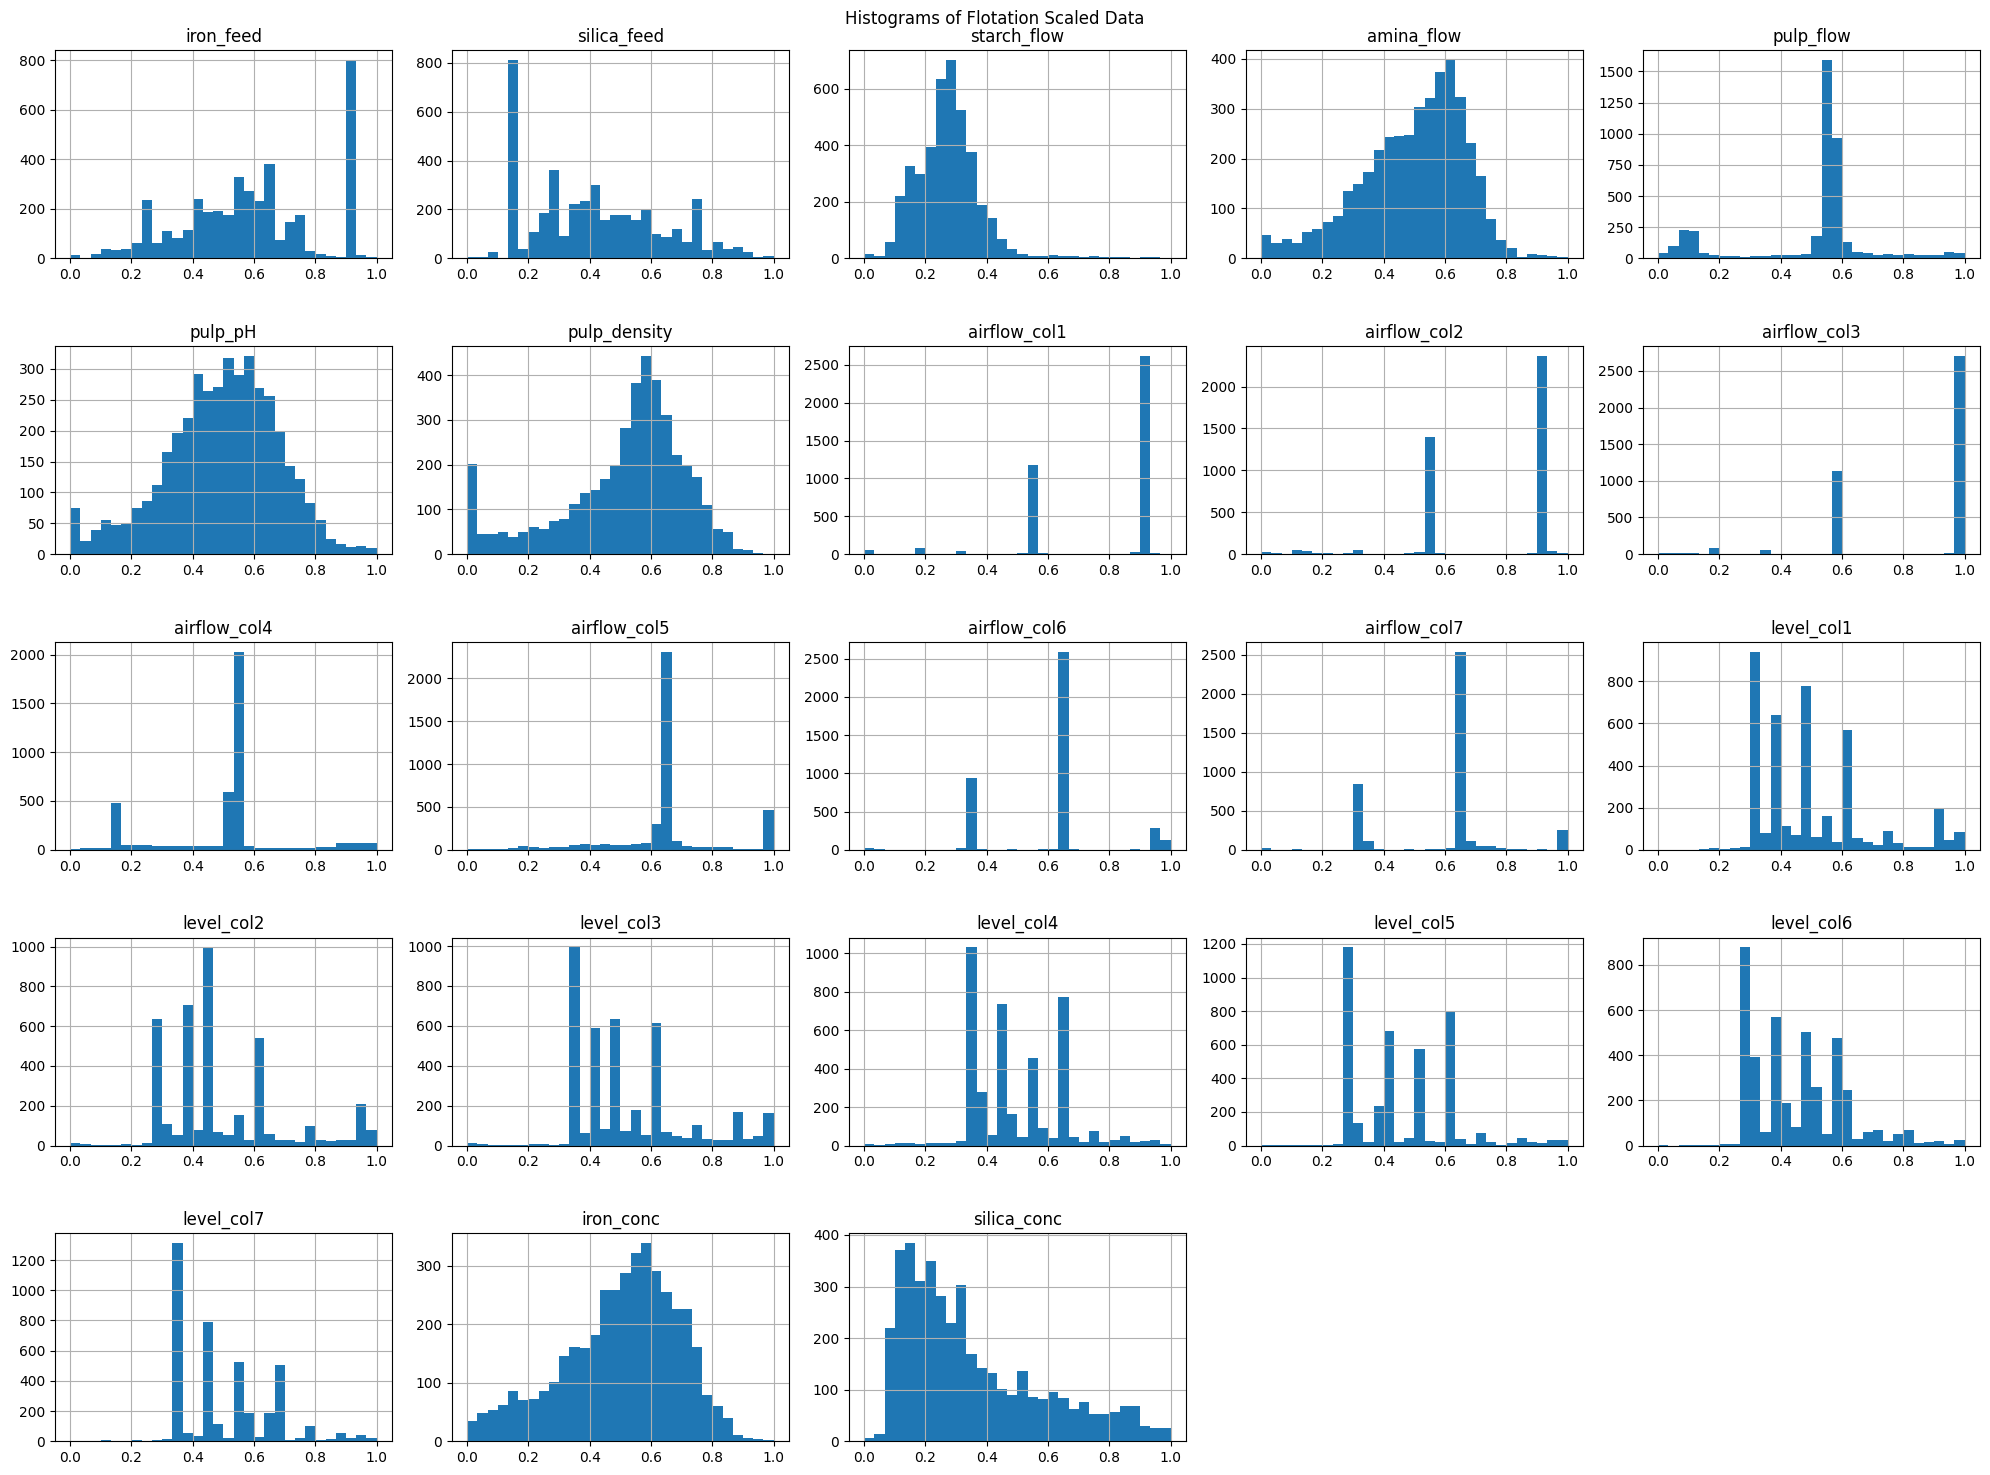

In [172]:
flotation_scaled.hist(figsize=(20, 15), bins=30)

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.suptitle("Histograms of Flotation Scaled Data")

plt.tight_layout(h_pad=3)
plt.show()

###**4.6. Corellation between the variables**

In [173]:
flotation_scaled.corr()

,iron_feed,silica_feed,starch_flow,amina_flow,pulp_flow,pulp_pH,pulp_density,airflow_col1,airflow_col2,airflow_col3,...,airflow_col7,level_col1,level_col2,level_col3,level_col4,level_col5,level_col6,level_col7,iron_conc,silica_conc
iron_feed,1.000000,-0.971833,-0.012717,-0.096238,0.186376,0.007447,-0.136398,-0.062829,-0.173618,-0.062608,...,-0.017228,0.031526,0.022945,0.016548,0.019283,0.026259,0.004367,0.030148,0.055456,-0.077109
silica_feed,-0.971833,1.000000,0.029068,0.085928,-0.174850,0.008366,0.113419,0.092421,0.187098,0.084740,...,0.047742,-0.040979,-0.040772,-0.024709,-0.040812,-0.049344,-0.023112,-0.054369,-0.044192,0.072776
starch_flow,-0.012717,0.029068,1.000000,0.039730,0.047833,0.230231,-0.118436,0.104599,0.113819,0.134941,...,0.139334,-0.198806,-0.166992,-0.137651,0.037623,0.044602,0.058808,0.015631,0.034950,-0.043254
amina_flow,-0.096238,0.085928,0.039730,1.000000,0.237698,0.134097,0.659852,0.121960,0.136965,0.111382,...,0.091266,-0.276231,-0.235440,-0.290003,-0.213123,-0.242181,-0.245009,-0.199479,-0.120417,0.171188
pulp_flow,0.186376,-0.174850,0.047833,0.237698,1.000000,0.138734,0.020162,-0.160514,-0.140517,-0.164090,...,-0.171500,-0.017236,-0.020330,-0.079746,-0.008856,0.005369,-0.023545,0.024683,0.096455,0.009754
pulp_pH,0.007447,0.008366,0.230231,0.134097,0.138734,1.000000,0.122764,0.168391,0.152147,0.199267,...,0.188266,-0.179804,-0.172865,-0.155092,0.057743,0.014351,-0.089912,0.022193,0.197910,-0.151390
pulp_density,-0.136398,0.113419,-0.118436,0.659852,0.020162,0.122764,1.000000,-0.005872,0.028603,-0.034911,...,-0.060513,-0.100675,-0.078463,-0.139910,-0.101537,-0.161884,-0.121059,-0.100247,0.016782,0.050890
airflow_col1,-0.062829,0.092421,0.104599,0.121960,-0.160514,0.168391,-0.005872,1.000000,0.866602,0.959976,...,0.678029,-0.476614,-0.472075,-0.406811,-0.074526,-0.103307,-0.141264,-0.128489,0.099325,-0.220847
airflow_col2,-0.173618,0.187098,0.113819,0.136965,-0.140517,0.152147,0.028603,0.866602,1.000000,0.879135,...,0.617616,-0.473867,-0.477461,-0.407485,-0.092445,-0.128454,-0.141335,-0.134058,0.060227,-0.171592
airflow_col3,-0.062608,0.084740,0.134941,0.111382,-0.164090,0.199267,-0.034911,0.959976,0.879135,1.000000,...,0.680862,-0.475383,-0.467455,-0.399045,-0.056629,-0.072604,-0.119034,-0.099591,0.100833,-0.220474


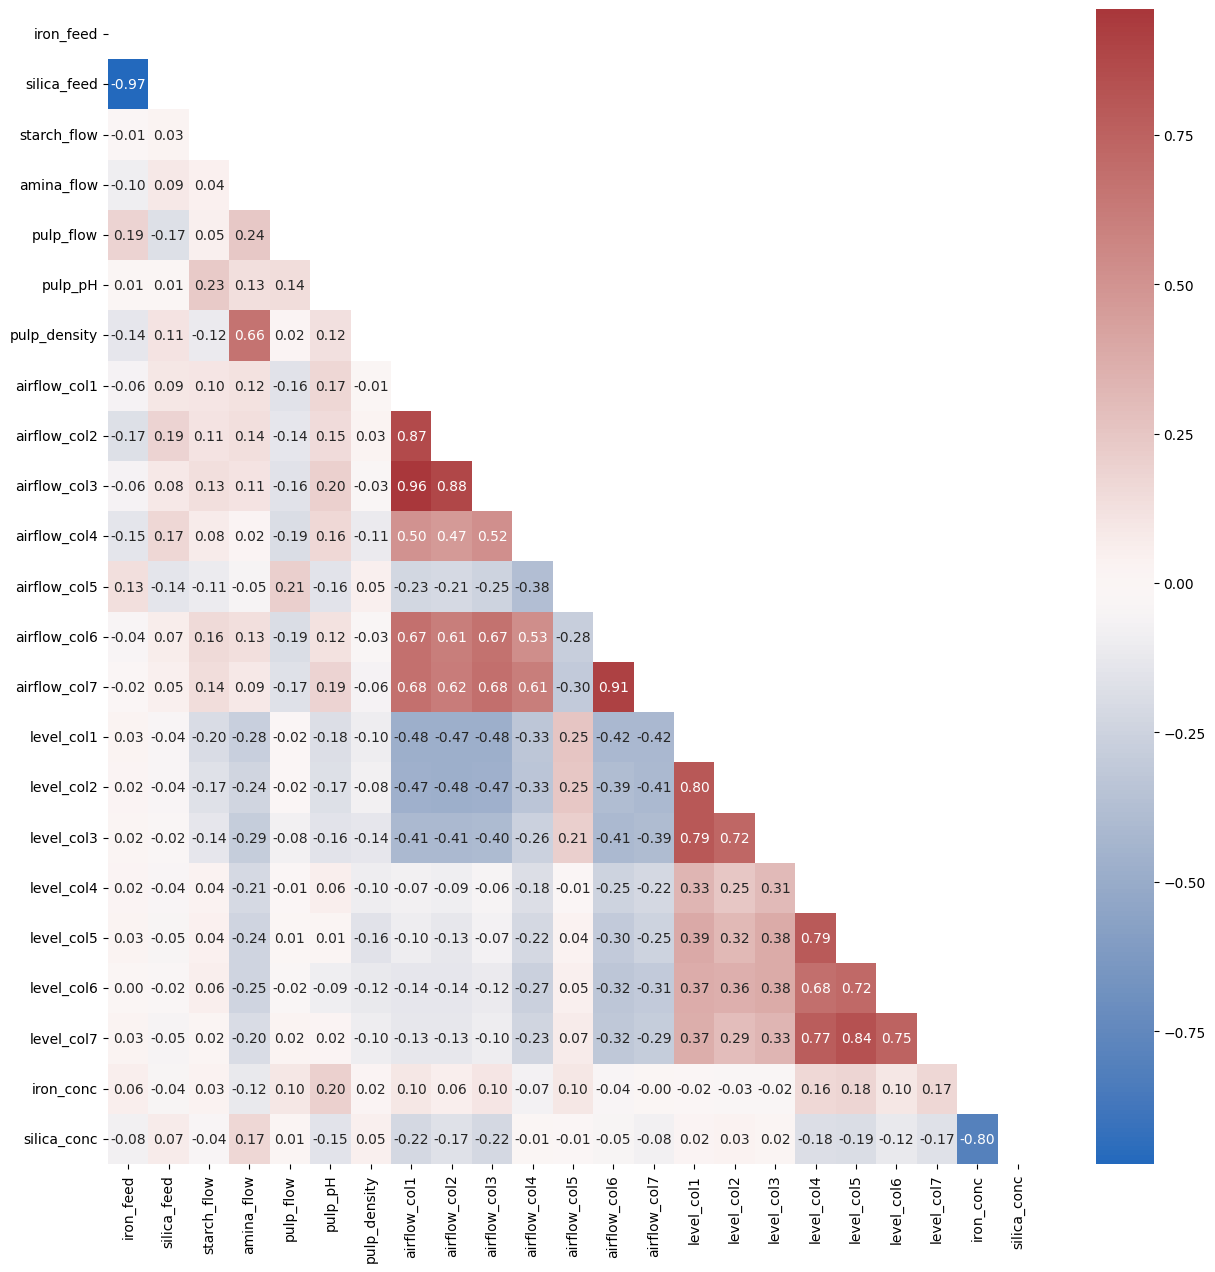

In [174]:
mask = np.triu(np.ones_like(flotation_scaled.corr(), dtype=bool))
plt.figure(figsize=(15, 15))
sns.heatmap(flotation_scaled.corr(), annot=True, fmt='.2f', cmap='vlag', 
            annot_kws={"fontsize": 10}, mask=mask)
plt.show()

###**4.6. Check & remove outliers**

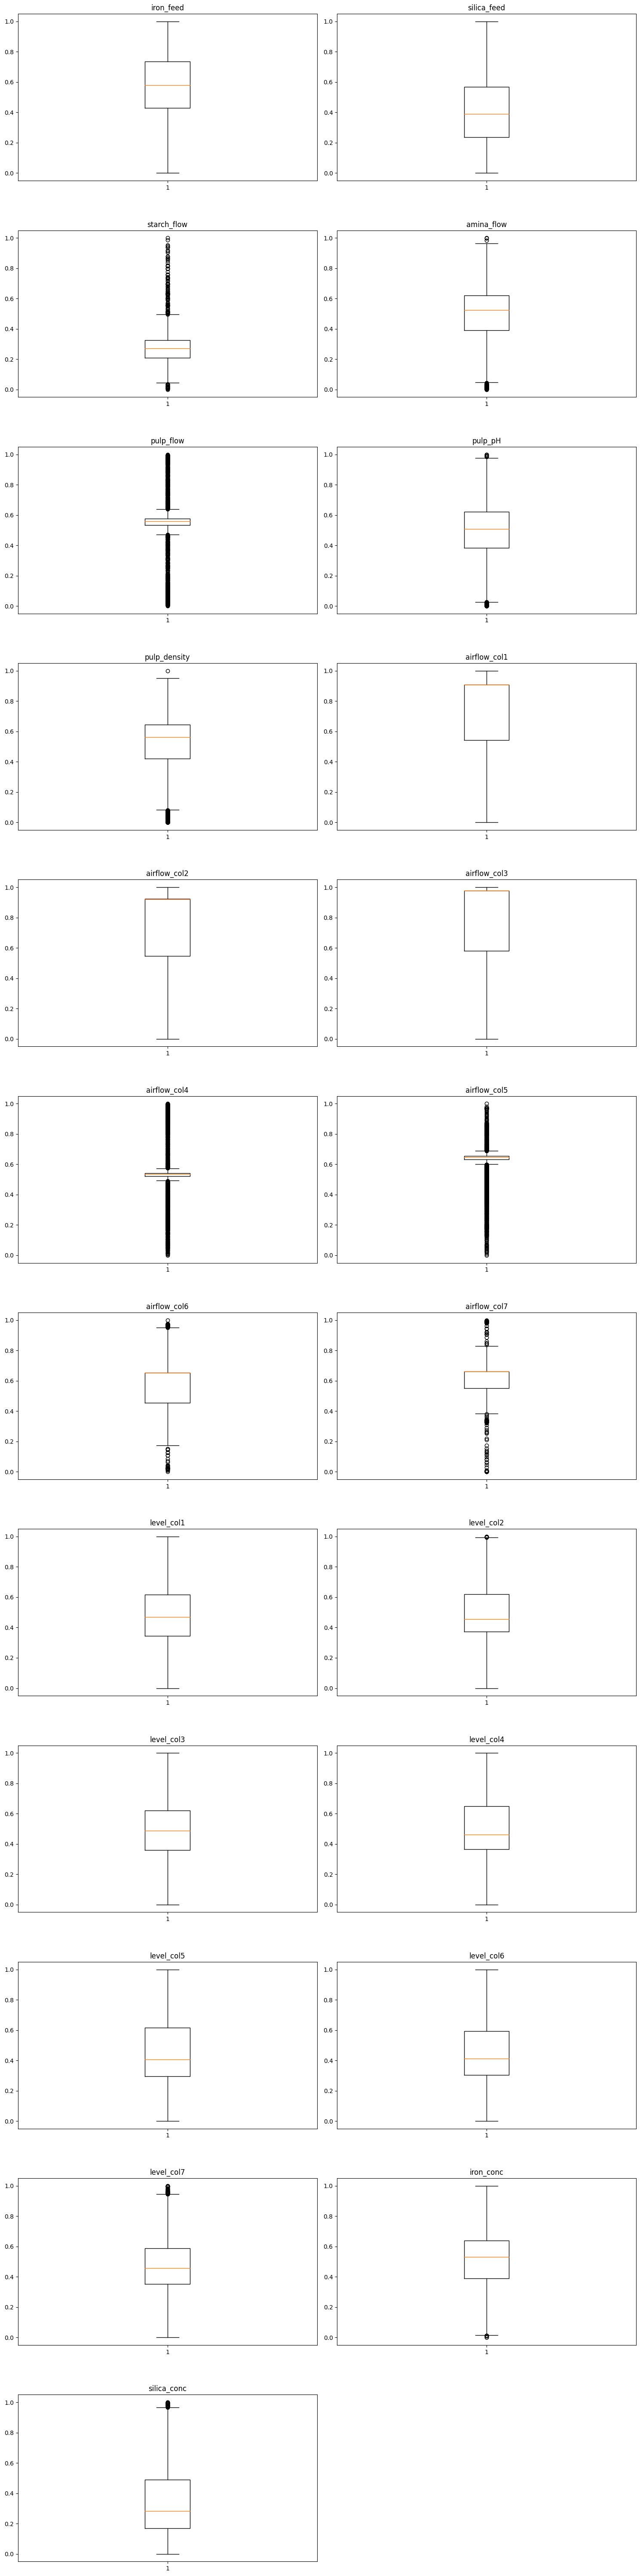

In [175]:
variables = ['iron_feed', 'silica_feed', 'starch_flow', 'amina_flow', 'pulp_flow',
       'pulp_pH', 'pulp_density', 'airflow_col1', 'airflow_col2',
       'airflow_col3', 'airflow_col4', 'airflow_col5', 'airflow_col6',
       'airflow_col7', 'level_col1', 'level_col2', 'level_col3', 'level_col4',
       'level_col5', 'level_col6', 'level_col7', 'iron_conc', 'silica_conc']

num_rows = (len(variables) + 1) // 2 
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, 
                         figsize=(15, num_rows * 5))

axes = axes.flatten()

for i, variable in enumerate(variables):
    data = flotation_scaled[variable]
    axes[i].boxplot(data)
    axes[i].set_title(variable)

for j in range(len(variables), 
               num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout(h_pad=5)
plt.show()

In [178]:
from scipy.stats import mstats
from scipy.stats.mstats import winsorize

variables = ['starch_flow', 'amina_flow', 'pulp_flow',
             'pulp_pH', 'pulp_density', 'airflow_col4', 
             'airflow_col5', 'airflow_col6', 'airflow_col7', 
             'level_col2', 'level_col7', 
             'iron_conc', 'silica_conc']

limits = {'starch_flow': [0.01, 0.03],
          'amina_flow': [0.03, 0.01],
          'pulp_flow': [0.2, 0.1],
          'pulp_pH': [0.05, 0.05],
          'pulp_density': [0.1, 0.01],
          'airflow_col4': [0.25, 0.25],
          'airflow_col5': [0.2, 0.2],
          'airflow_col6': [0.2, 0.2],
          'airflow_col7': [0.25, 0.10],
          'level_col2': [0.01, 0.01],
          'level_col7': [0.01, 0.02],
          'iron_conc': [0.01, 0.01],
          'silica_conc': [0.01, 0.02]
          }

for variable in variables:
    data = flotation_scaled[variable]
    limit = limits[variable]
    data_winsorized = winsorize(data, limits=limit)
    flotation_scaled[variable] = data_winsorized

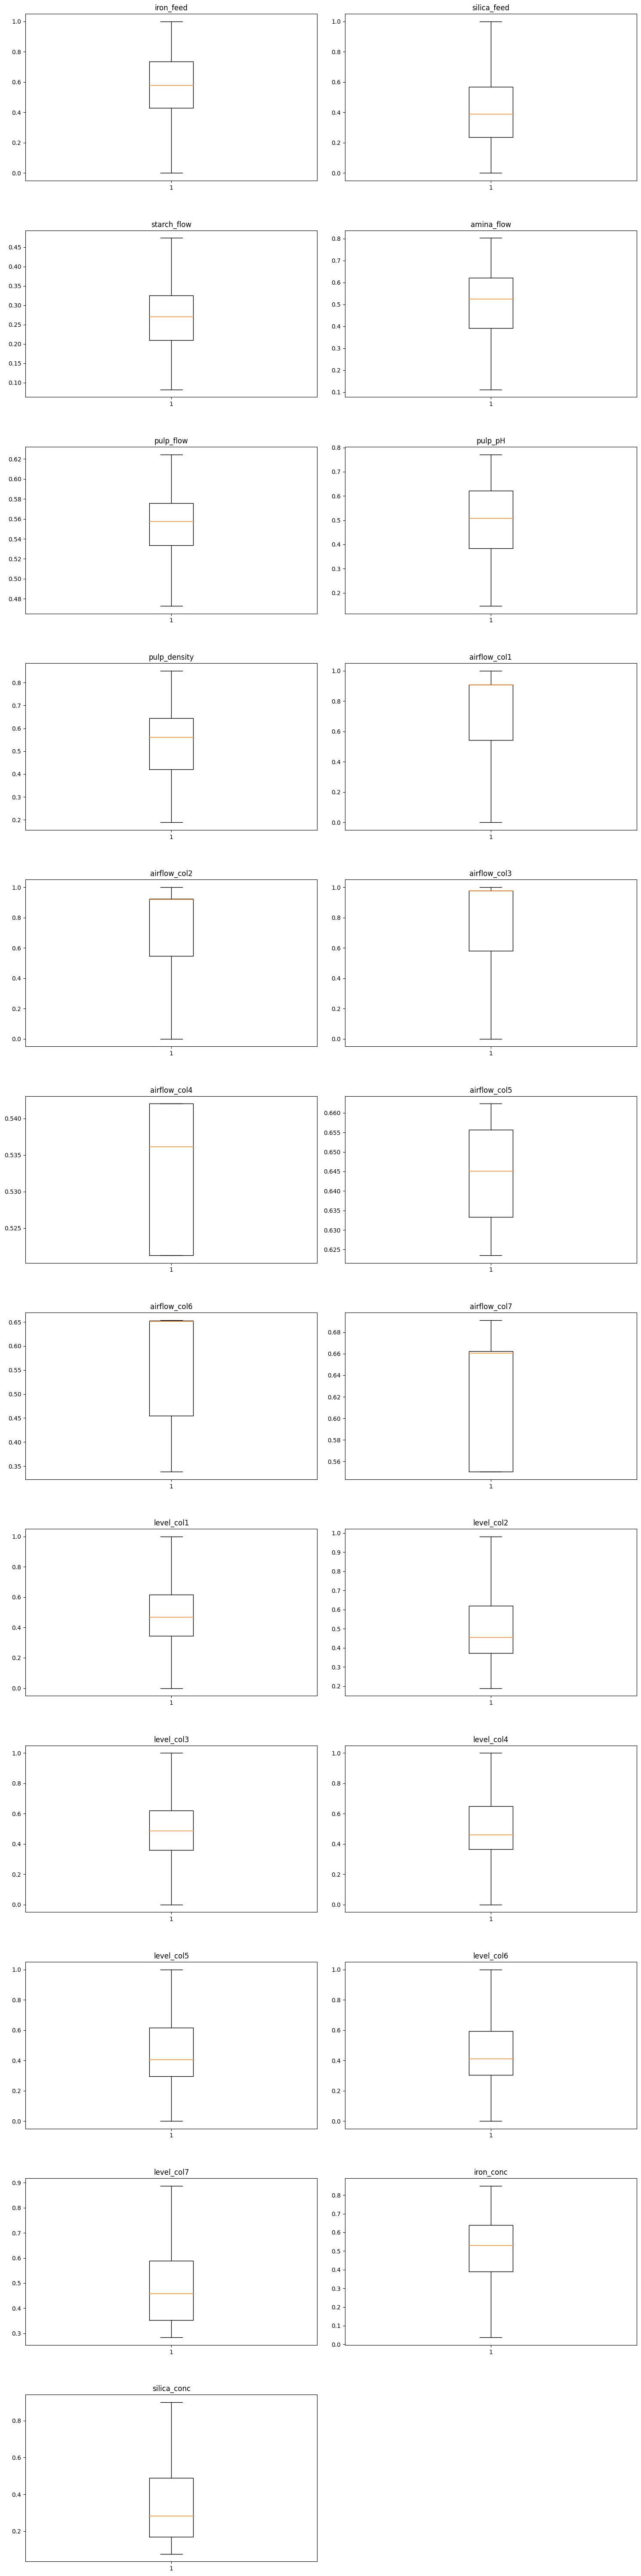

In [179]:
variables = ['iron_feed', 'silica_feed', 'starch_flow', 'amina_flow', 'pulp_flow',
       'pulp_pH', 'pulp_density', 'airflow_col1', 'airflow_col2',
       'airflow_col3', 'airflow_col4', 'airflow_col5', 'airflow_col6',
       'airflow_col7', 'level_col1', 'level_col2', 'level_col3', 'level_col4',
       'level_col5', 'level_col6', 'level_col7', 'iron_conc', 'silica_conc']

num_rows = (len(variables) + 1) // 2 
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, 
                         figsize=(15, num_rows * 5))

axes = axes.flatten()

for i, variable in enumerate(variables):
    data = flotation_scaled[variable]
    axes[i].boxplot(data)
    axes[i].set_title(variable)

for j in range(len(variables), 
               num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout(h_pad=5)
plt.show()

In [168]:
flotation_scaled.sample(5).T

,610,1815,1892,1565,3563
iron_feed,0.409288,0.924045,0.924045,0.924045,0.385417
silica_feed,0.541602,0.154254,0.154254,0.154254,0.551574
starch_flow,0.270512,0.270512,0.270512,0.270512,0.270512
amina_flow,0.354696,0.432567,0.506228,0.374949,0.759118
pulp_flow,0.562143,0.517609,0.571495,0.531985,0.624605
pulp_pH,0.151276,0.398362,0.424702,0.484298,0.601996
pulp_density,0.484919,0.188492,0.256926,0.279221,0.646140
airflow_col1,0.544124,0.908365,0.909482,0.909274,0.908972
airflow_col2,0.544968,0.547648,0.929526,0.922747,0.924151
airflow_col3,0.579986,0.976432,0.977191,0.977066,0.977604


###**4.7. Check & remove outliers**

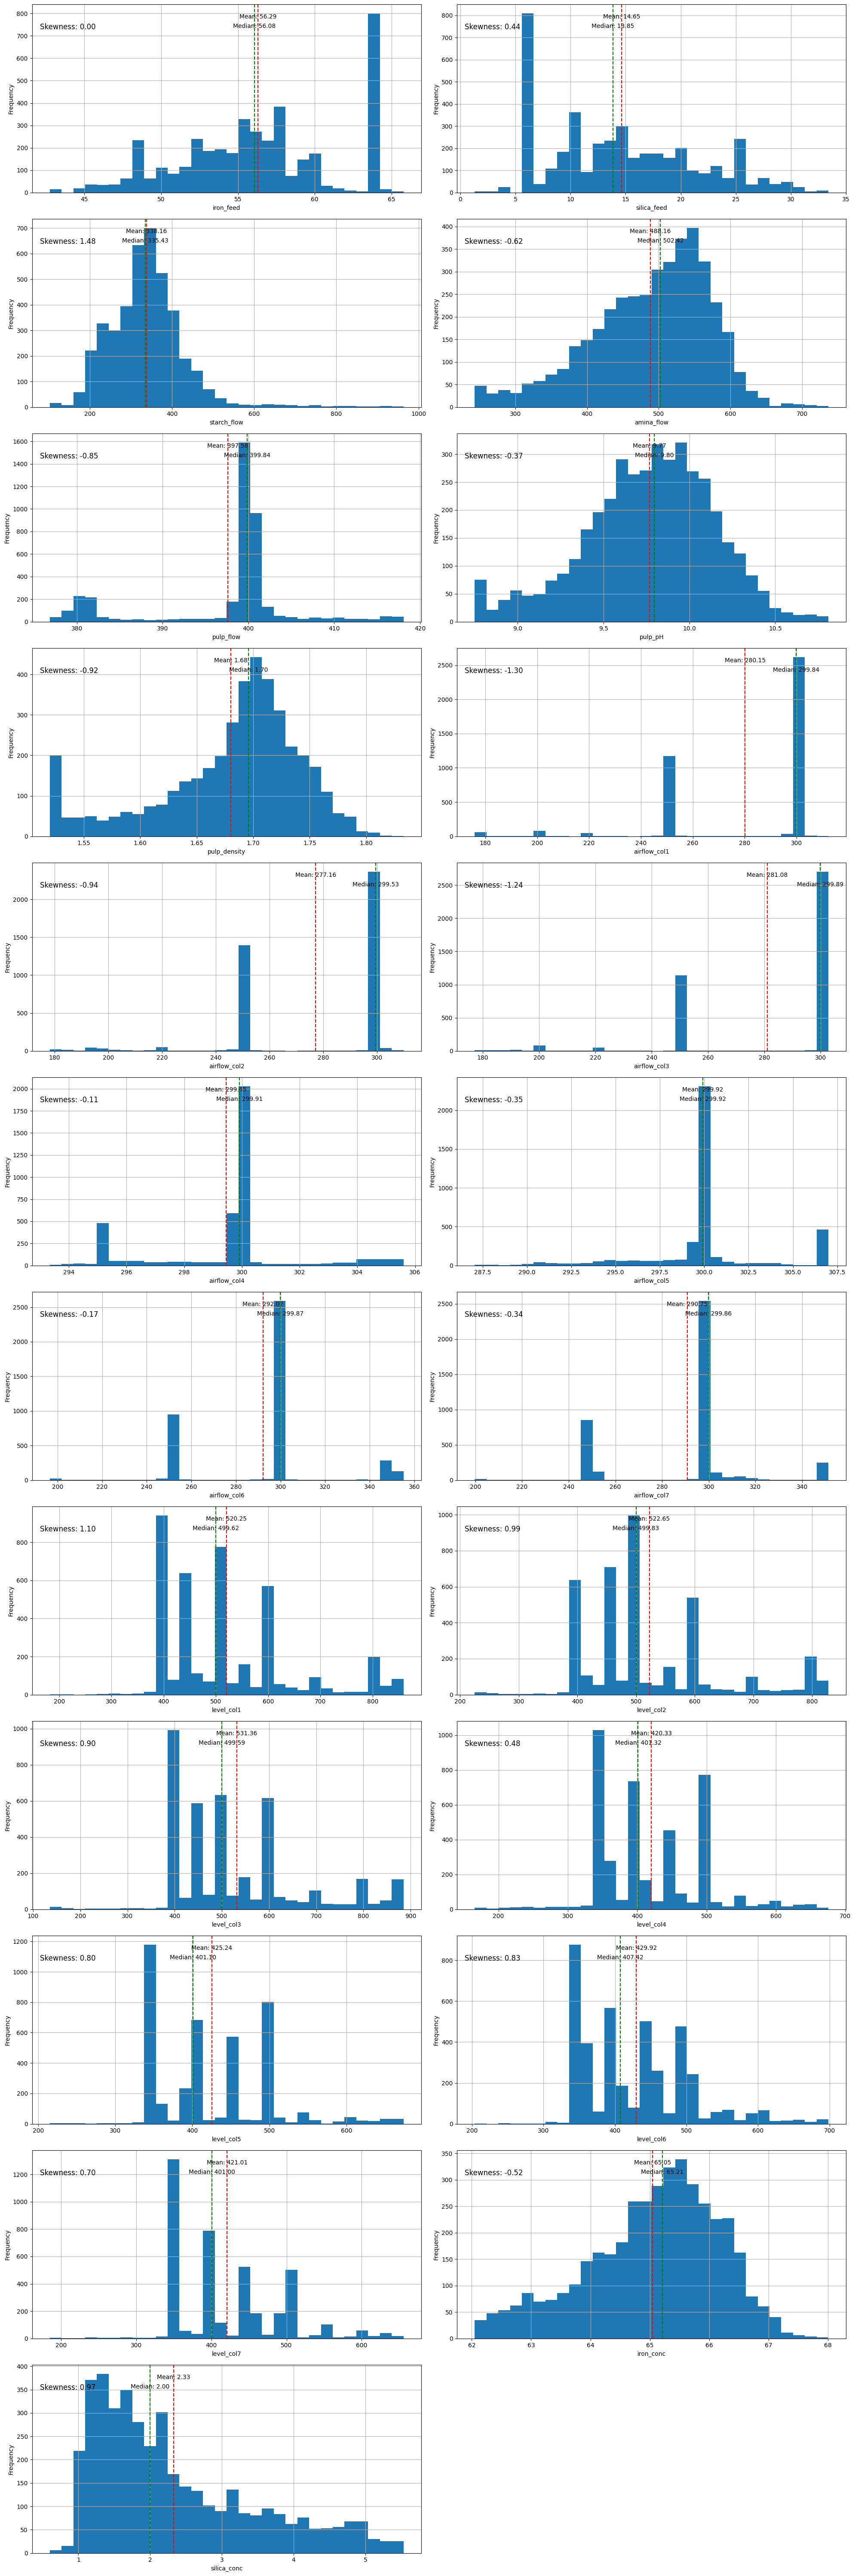

In [145]:
from scipy.stats import skew

variables = ['iron_feed', 'silica_feed', 'starch_flow', 'amina_flow', 'pulp_flow',
       'pulp_pH', 'pulp_density', 'airflow_col1', 'airflow_col2',
       'airflow_col3', 'airflow_col4', 'airflow_col5', 'airflow_col6',
       'airflow_col7', 'level_col1', 'level_col2', 'level_col3', 'level_col4',
       'level_col5', 'level_col6', 'level_col7', 'iron_conc', 'silica_conc']

num_vars = len(variables)
num_rows = (num_vars + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(20, num_rows * 5))

for i, variable in enumerate(variables):
    # Select a specific column for skewness calculation
    data = flotation[variable].to_numpy()
    # Calculate the skewness degree
    skewness = skew(data)
    # Determine the subplot position
    row = i // 2
    col = i % 2
    # Plotting the variable in the corresponding subplot
    axes[row, col].hist(data, bins=30)
    axes[row, col].set_xlabel(variable)
    axes[row, col].set_ylabel("Frequency")
    axes[row, col].axvline(np.mean(data), color='r', linestyle='--')
    axes[row, col].axvline(np.median(data), color='g', linestyle='--')
    # Display the skewness degree in the plot frame
    axes[row, col].text(0.02, 0.9, f"Skewness: {skewness:.2f}",
                        transform=axes[row, col].transAxes, 
                        fontsize=12, verticalalignment='top')
    # Display the mean and median values
    ylim = axes[row, col].get_ylim()
    y_range = ylim[1] - ylim[0]
    axes[row, col].text(np.mean(data), ylim[1] - 0.05 * y_range,
                        f"Mean: {np.mean(data):.2f}", color='black', fontsize=10,
                        verticalalignment='top', horizontalalignment='center')
    axes[row, col].text(np.median(data), ylim[1] - 0.1 * y_range,
                        f"Median: {np.median(data):.2f}", color='black', fontsize=10,
                        verticalalignment='top', horizontalalignment='center')
    axes[row, col].grid(True)

if num_vars % 2 != 0:
    axes[num_rows - 1, 1].axis('off')

plt.tight_layout()
plt.show()

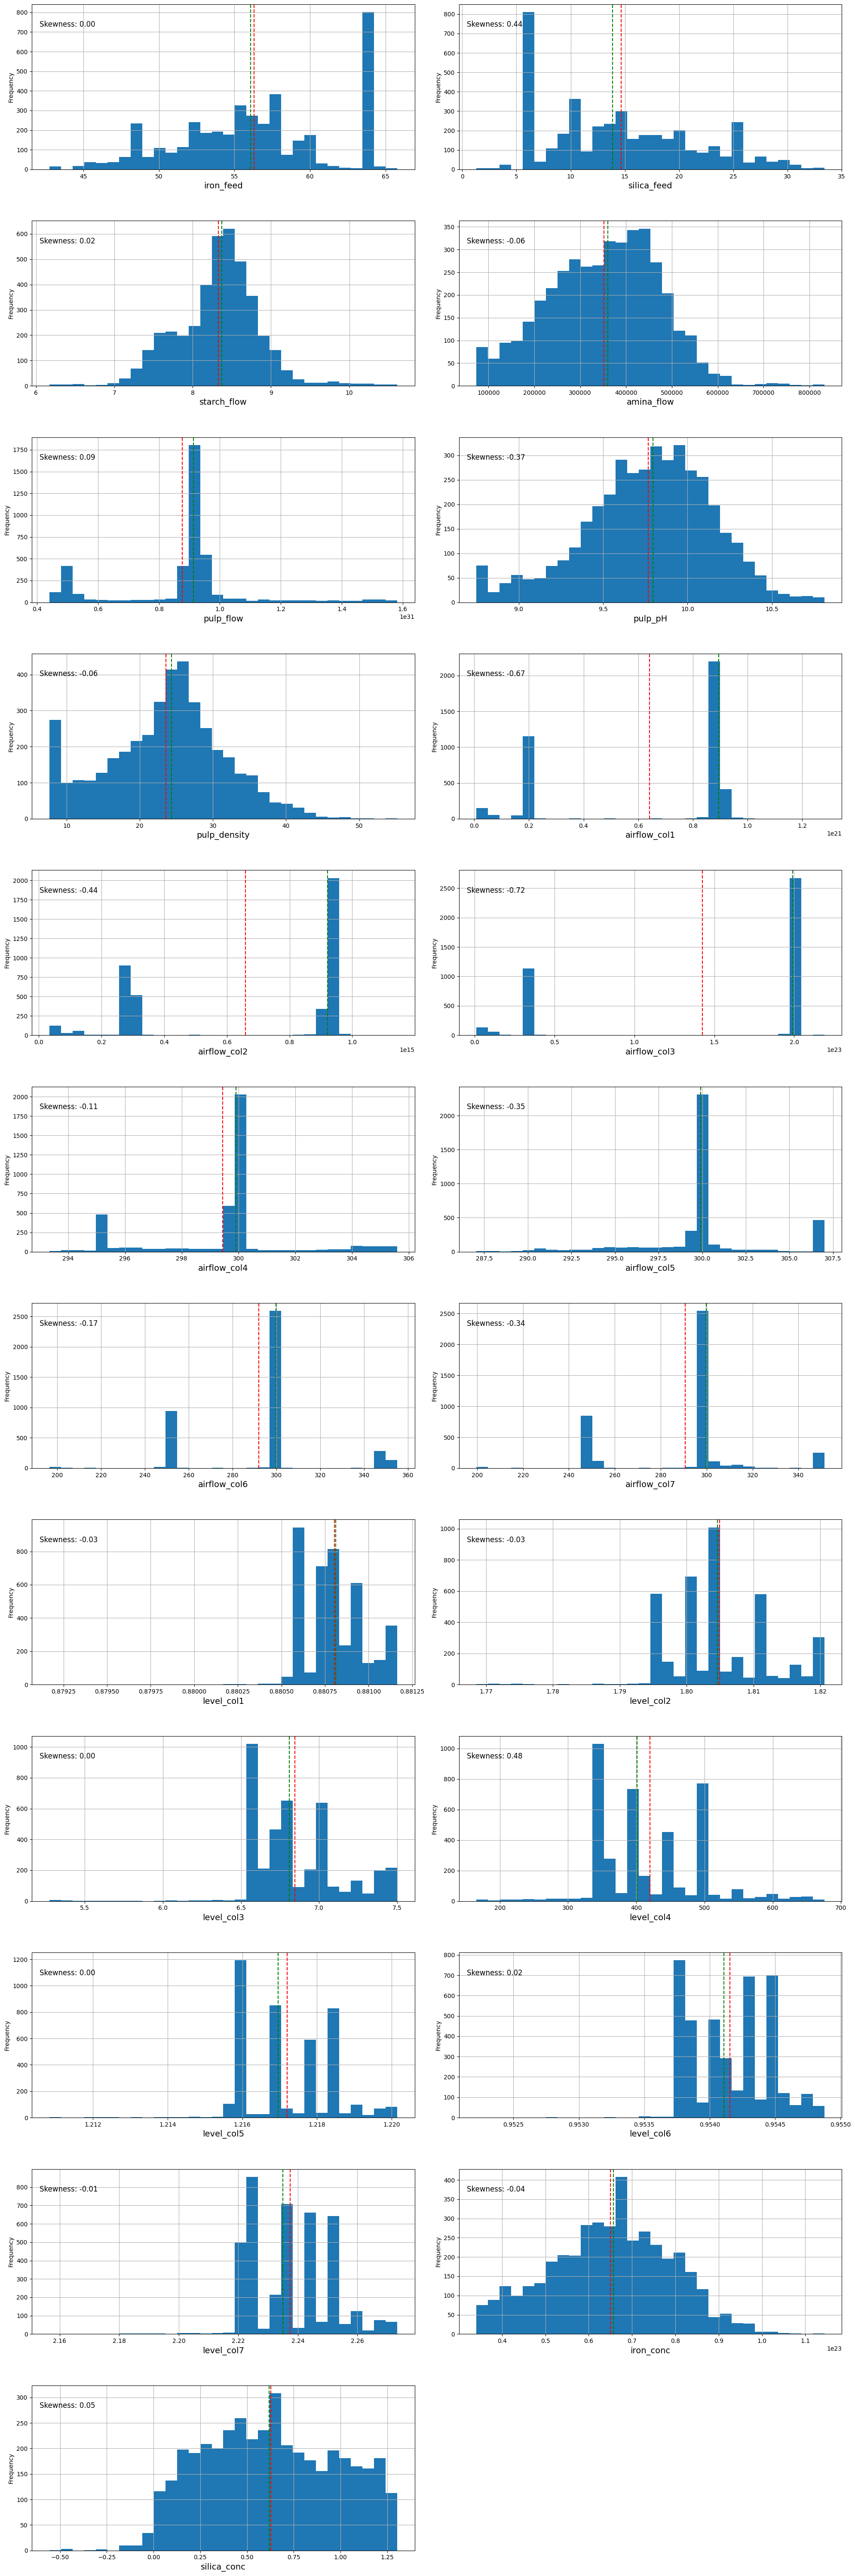

In [146]:
from scipy.stats import boxcox

variables = ['iron_feed', 'silica_feed', 'starch_flow', 'amina_flow', 'pulp_flow',
       'pulp_pH', 'pulp_density', 'airflow_col1', 'airflow_col2',
       'airflow_col3', 'airflow_col4', 'airflow_col5', 'airflow_col6',
       'airflow_col7', 'level_col1', 'level_col2', 'level_col3', 'level_col4',
       'level_col5', 'level_col6', 'level_col7', 'iron_conc', 'silica_conc']

num_vars = len(variables)
num_rows = (num_vars + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(20, num_rows * 5))

for i, variable in enumerate(variables):
    # Select a specific column for skewness calculation
    data = flotation[variable].to_numpy()
    # Calculate the skewness degree
    skewness = skew(data)
    
    # Apply Box-Cox transformation if skewness is greater than 0.5
    if abs(skewness) > 0.5:
        data, _ = boxcox(data)
    
    # Determine the subplot position
    row = i // 2
    col = i % 2
    # Plotting the variable in the corresponding subplot
    axes[row, col].hist(data, bins=30)
    axes[row, col].set_xlabel(variable, fontsize=14)
    axes[row, col].set_ylabel("Frequency")
    axes[row, col].axvline(np.mean(data), color='r', linestyle='--')
    axes[row, col].axvline(np.median(data), color='g', linestyle='--')
    axes[row, col].grid(True)  # Add grid lines
    # Display the skewness degree in the plot frame
    axes[row, col].text(0.02, 0.9, f"Skewness: {skew(data):.2f}",
                        transform=axes[row, col].transAxes, 
                        fontsize=12, verticalalignment='top')

if num_vars % 2 != 0:
    axes[num_rows - 1, 1].axis('off')

plt.tight_layout(h_pad=5)
plt.show()

In [147]:
flotation_scaled.head()

,iron_feed,silica_feed,starch_flow,amina_flow,pulp_flow,pulp_pH,pulp_density,airflow_col1,airflow_col2,airflow_col3,...,airflow_col7,level_col1,level_col2,level_col3,level_col4,level_col5,level_col6,level_col7,iron_conc,silica_conc
0,0.540799,0.488314,0.270512,0.679824,0.531502,0.661952,0.669810,0.551874,0.547158,0.581109,...,0.550499,0.396540,0.368213,0.420553,0.557319,0.524635,0.526759,0.564305,0.815436,0.144016
1,0.540799,0.488314,0.270512,0.596311,0.560211,0.669515,0.472780,0.542356,0.546892,0.580131,...,0.550499,0.395090,0.374878,0.419769,0.557684,0.509706,0.508932,0.567778,0.840604,0.103448
2,0.540799,0.488314,0.270512,0.706381,0.531756,0.630313,0.680682,0.544504,0.546232,0.580058,...,0.550499,0.395933,0.374809,0.421123,0.559738,0.514491,0.517861,0.563804,0.825503,0.135903
3,0.540799,0.488314,0.270512,0.707861,0.558751,0.569146,0.671666,0.544435,0.545616,0.580757,...,0.550499,0.446645,0.436831,0.464708,0.638346,0.602954,0.598377,0.650466,0.788591,0.154158
4,0.540799,0.488314,0.270512,0.762679,0.554377,0.483572,0.785562,0.542823,0.546212,0.579714,...,0.550499,0.542280,0.538981,0.552724,0.753329,0.728375,0.721411,0.776632,0.768456,0.150101


In [148]:
flotation_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
iron_feed,4097.0,0.588313,2.238866e-01,0.000000,0.430990,0.578993,0.736979,1.000000
silica_feed,4097.0,0.415760,2.121607e-01,0.000000,0.237769,0.390776,0.569959,1.000000
starch_flow,4097.0,0.270512,5.551793e-17,0.270512,0.270512,0.270512,0.270512,0.270512
amina_flow,4097.0,0.497535,1.632304e-01,0.111850,0.390872,0.525247,0.620523,0.803024
pulp_flow,4097.0,0.550006,4.628325e-02,0.472821,0.533510,0.557874,0.575850,0.624605
pulp_pH,4097.0,0.494687,1.683070e-01,0.145740,0.383495,0.507593,0.621828,0.771654
pulp_density,4097.0,0.524964,1.757530e-01,0.188492,0.419616,0.561580,0.644524,0.851526
airflow_col1,4097.0,0.764357,2.156084e-01,0.000000,0.543973,0.908686,0.909520,1.000000
airflow_col2,4097.0,0.751714,2.234811e-01,0.000000,0.546171,0.921628,0.925059,1.000000
airflow_col3,4097.0,0.827194,2.259430e-01,0.000000,0.580412,0.976925,0.977416,1.000000


###**4.8. Save manipulated dataset to new file**

In [149]:
flotation_scaled.to_csv('/content/drive/My Drive/Flotation/flotation_scaled.csv', index=False)